In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [19]:
print(os.listdir('../IA_ML'))

['.git', '.ipynb_checkpoints', 'class.xls', 'Data_Summary.ipynb', 'TP2.ipynb', 'zoo.xls']


In [28]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('../IA_ML/class.xls', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'class.xls'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 7 rows and 4 columns


In [29]:
df1.head(5)

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [30]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [31]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [32]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [36]:
plotPerColumnDistribution(df1, 10, 5)

ValueError: Number of rows must be a positive integer, not 1.6

<Figure size 2400x1024 with 0 Axes>

C:\Users\jackg\AppData\Local\Temp/ipykernel_17924/3510424060.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


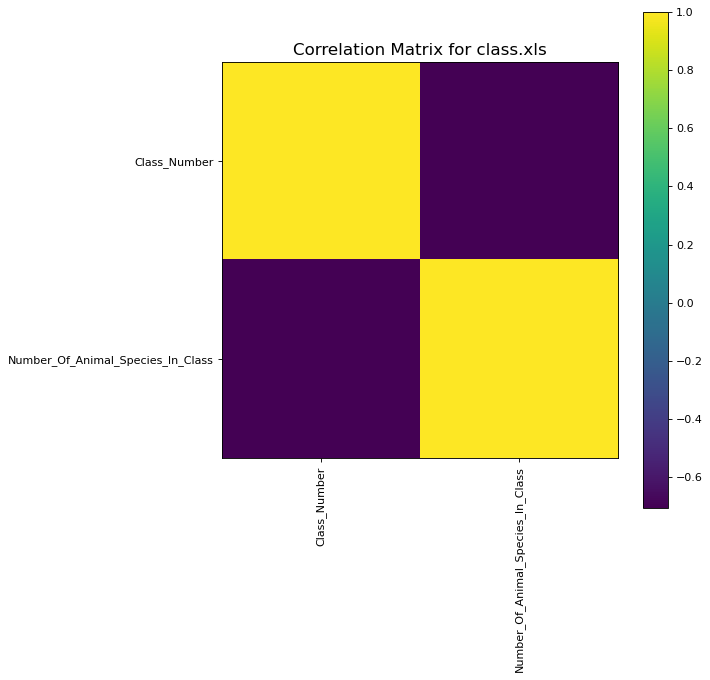

In [37]:
plotCorrelationMatrix(df1, 8)

C:\Users\jackg\AppData\Local\Temp/ipykernel_17924/102845399.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


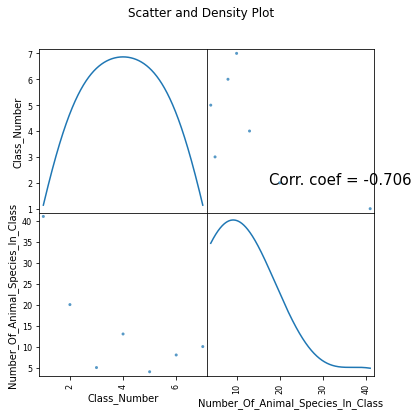

In [35]:
plotScatterMatrix(df1, 6, 15)

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df2 = pd.read_csv('../IA_ML/zoo.xls', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'zoo.xls'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

In [ ]:
df2.head(5)

In [38]:
plotPerColumnDistribution(df2, 10, 5)

NameError: name 'df2' is not defined

C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_7452/3510424060.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


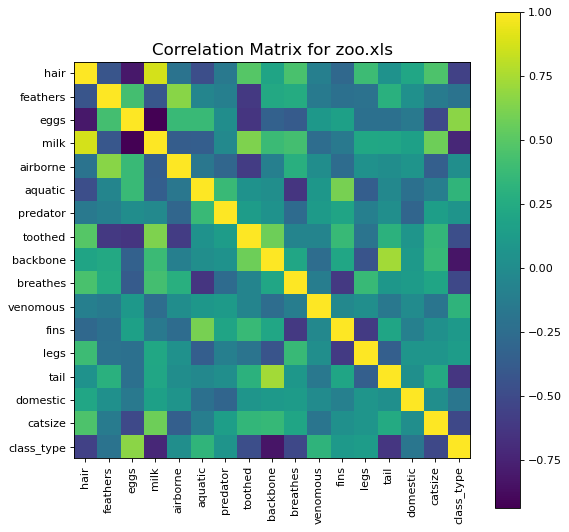

In [20]:
plotCorrelationMatrix(df2, 8)

C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_7452/102845399.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


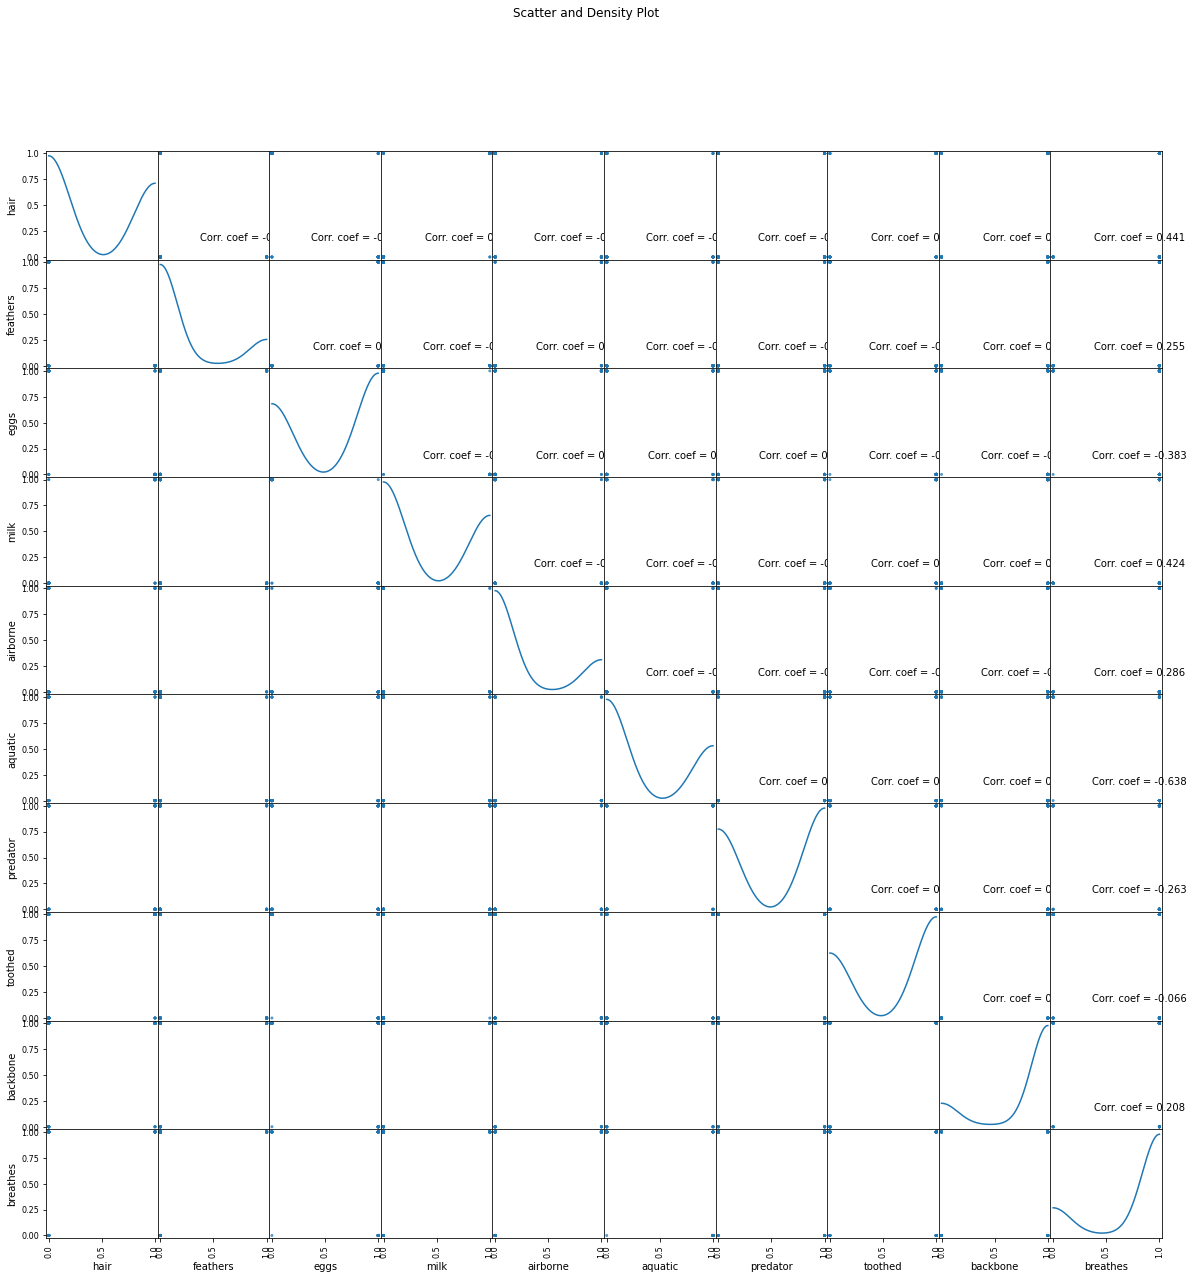

In [21]:
plotScatterMatrix(df2, 20, 10)

In [3]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk("../IA_ML"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../IA_ML\class.xls
../IA_ML\Data_Summary.ipynb
../IA_ML\TP2.ipynb
../IA_ML\zoo.xls
../IA_ML\.git\COMMIT_EDITMSG
../IA_ML\.git\config
../IA_ML\.git\description
../IA_ML\.git\HEAD
../IA_ML\.git\index
../IA_ML\.git\hooks\applypatch-msg.sample
../IA_ML\.git\hooks\commit-msg.sample
../IA_ML\.git\hooks\fsmonitor-watchman.sample
../IA_ML\.git\hooks\post-update.sample
../IA_ML\.git\hooks\pre-applypatch.sample
../IA_ML\.git\hooks\pre-commit.sample
../IA_ML\.git\hooks\pre-merge-commit.sample
../IA_ML\.git\hooks\pre-push.sample
../IA_ML\.git\hooks\pre-rebase.sample
../IA_ML\.git\hooks\pre-receive.sample
../IA_ML\.git\hooks\prepare-commit-msg.sample
../IA_ML\.git\hooks\push-to-checkout.sample
../IA_ML\.git\hooks\update.sample
../IA_ML\.git\info\exclude
../IA_ML\.git\logs\HEAD
../IA_ML\.git\logs\refs\heads\main
../IA_ML\.git\logs\refs\remotes\origin\main
../IA_ML\.git\objects\1a\bcc4566f2265f2eaca5ad81d560df4a744540e
../IA_ML\.git\objects\2a\c16ab2e0f0f5bc7eee3c3e9b3fc981dfe7624a
../IA_ML\.git\obje

In [2]:
zoo = pd.read_csv("../IA_ML/zoo.xls")
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
zoo_class = pd.read_csv("../IA_ML/class.xls")
zoo_class

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [4]:
labels = zoo_class['Class_Type'].to_list()
labels

['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']

In [5]:
zoo["class_name"] = zoo["class_type"].apply(lambda x : labels[x-1])

In [6]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,class_name
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal


In [7]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
#zoo['legs'] = zoo['legs'] / zoo['legs'].max()

In [9]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,class_name
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal


In [15]:
X = zoo.drop(['animal_name', 'class_type', 'class_name'], axis=1)
y = zoo['class_type']
df_zoo = pd.read_csv("../IA_ML/zoo.xls")
df_zoo = df_zoo.set_index(['animal_name'])
target = np.array(df_zoo.iloc[:,-1])
data = np.array(df_zoo.iloc[:,:-1])

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


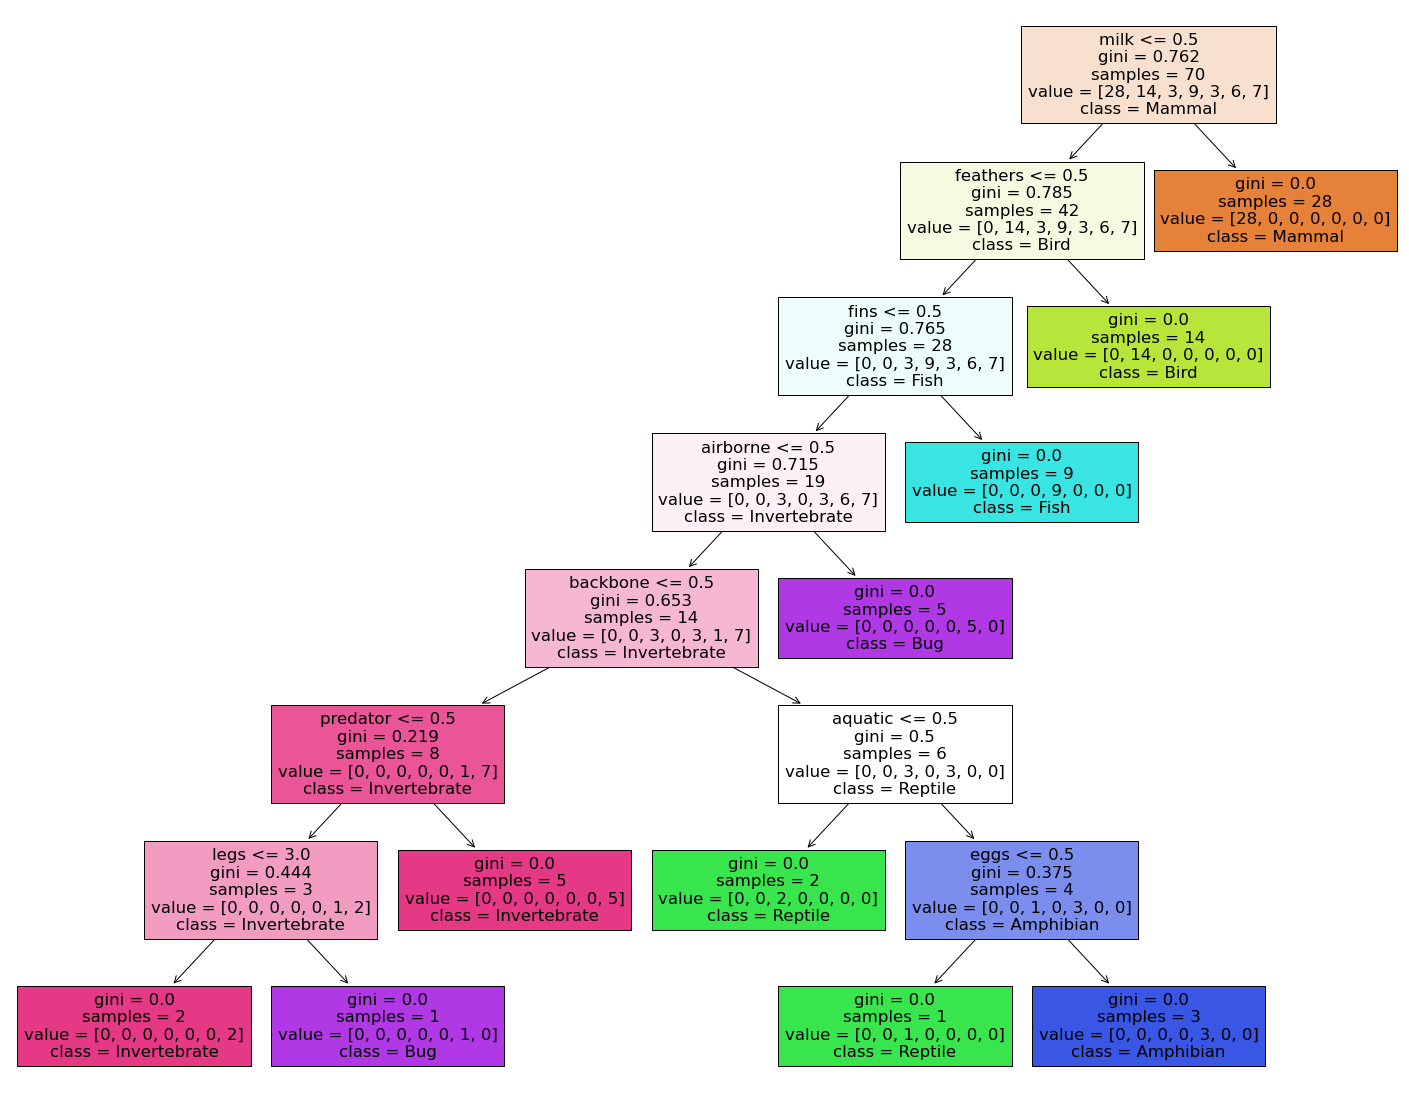

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
clf = DecisionTreeClassifier()
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.30,stratify=target)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                  feature_names=df_zoo.iloc[:,:-1].columns,  
                  class_names=labels,
                  filled=True)

In [26]:
from sklearn.decomposition import PCA

pca = PCA(2)

X_reduced = pca.fit_transform(X)

In [ ]:
import plotly.express as px

fig = px.scatter(
    zoo,
    x=X_reduced[:,0], 
    y=X_reduced[:,1], 
    color="class_type",
    hover_name="class_name"
)

fig.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc_model = RandomForestClassifier(max_depth=10, n_jobs=-1)

rfc_model.fit(X_reduced, y)

scores = cross_val_score(rfc_model, X_reduced, y, cv=4)

final_score = rfc_model.score(X_reduced, y)

print(f"Scores: {scores} \nMean: {scores.mean()} \nFinal Score: {final_score}")

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # 80% training and 20% test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))

In [28]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))

Accuracy: 0.9354838709677419
Precision: 0.9566666666666667
Recall: 0.9666666666666667


In [29]:
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3,random_state=109)
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))

Accuracy: 0.7741935483870968
Precision: 0.8280864197530863
Recall: 0.8888888888888888


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.impute import SimpleImputer
from sklearn import tree
clf = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

text_representation = tree.export_text(clf)
print(text_representation)

print(y_pred)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                  feature_names=y,  
                  class_names=labels,
                  filled=True)


KNN: 0.771135 (0.055193)
CART: 0.972222 (0.039284)
SVM: 0.785024 (0.063265)


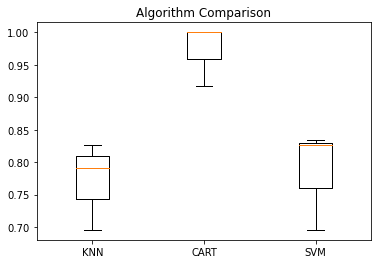

In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.30,stratify=target)
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', svm.SVC(gamma='auto')))
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [54]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy: \n",metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix: \n",metrics.confusion_matrix(y_test, y_pred))
print("Classification Report: \n",metrics.classification_report(y_test, y_pred))

Accuracy: 
 0.9032258064516129
Confusion matrix: 
 [[13  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  0  0  1  1  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  1  2]]
Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         4
           5       0.50      1.00      0.67         1
           6       0.50      1.00      0.67         2
           7       1.00      0.67      0.80         3

    accuracy                           0.90        31
   macro avg       0.71      0.81      0.73        31
weighted avg       0.89      0.90      0.88        31



C:\Users\jackg\.conda\envs\IA_ISPG\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jackg\.conda\envs\IA_ISPG\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jackg\.conda\envs\IA_ISPG\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=10, random_state=0)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(f"(train) accuracy_score: {model.score(X_train, y_train)}")

In [ ]:
print(f"(test) accuracy_score: {model.score(X_test, y_test)}")

In [ ]:
y_pred = model.predict(X_reduced)

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_reduced)

cm = confusion_matrix(y, y_pred)

In [ ]:
import plotly.express as px

fig = px.imshow(
    cm,
    labels=dict(x="Predicted Label", y="True Label"),
    x=labels,
    y=labels
)
fig.update_xaxes(side="top")
fig.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_reduced)

print(classification_report(y, y_pred, target_names=labels, zero_division=0))

In [ ]:
pca_components = pd.DataFrame(pca.components_, columns=X.columns)
pca_components